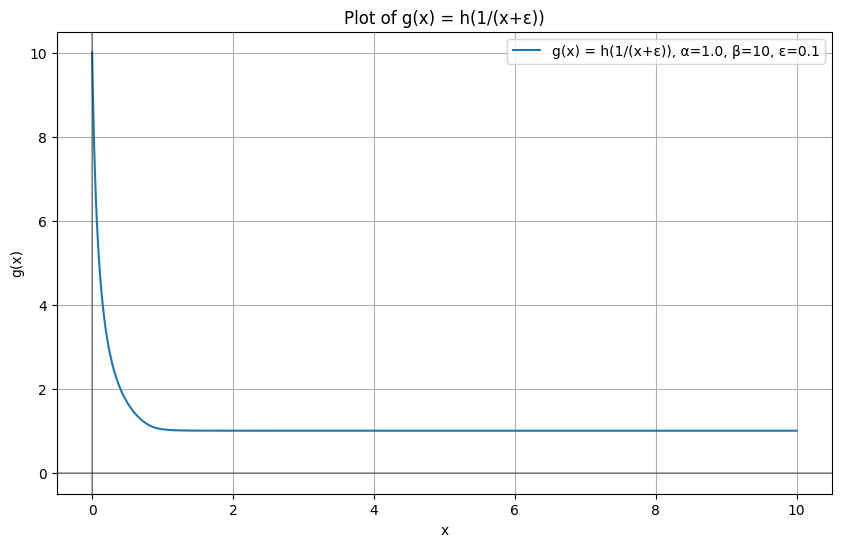

In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

class My_SoftPlus:
    def __init__(self, alpha, beta=10):
        self.alpha = alpha
        self.beta = beta
    
    def forward(self, x):
        f = torch.nn.Softplus(beta=self.beta)
        x = x + f(self.alpha - x)
        return x
    
    def __call__(self, x):
        return self.forward(x)

#function g(x) = f(1/(x+epsilon))
def g(x, softplus_func, epsilon=0.1):
    x_tensor = torch.tensor(x, dtype=torch.float32)
    
    inverse = 1/(x_tensor + epsilon)
    
    result = softplus_func(inverse)
    
    return result.detach().numpy()

# Create plot
def plot_g_function(alpha=1.0, beta=10, x_min=0, x_max=10, num_points=1000, epsilon=0.1):
    x = np.linspace(x_min, x_max, num_points)
    
    softplus = My_SoftPlus(alpha=alpha, beta=beta)
    
    y = g(x, softplus, epsilon)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'g(x) = h(1/(x+ε)), α={alpha}, β={beta}, ε={epsilon}')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.title('Plot of g(x) = h(1/(x+ε))')
    plt.legend()
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.show()

plot_g_function(alpha=1.0, beta=10, x_min=0, x_max=10, epsilon=0.1)

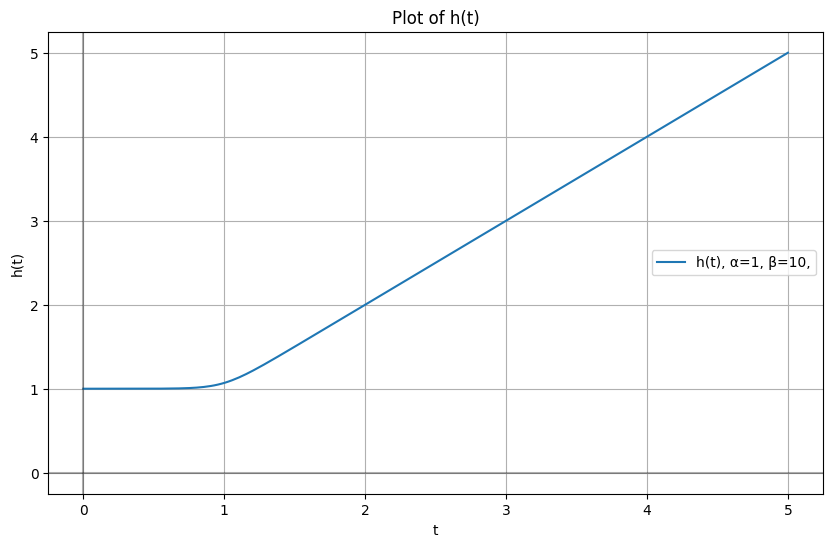

In [14]:
def h(x, softplus_func):
    x_tensor = torch.tensor(x, dtype=torch.float32)
    
    result = softplus_func(x_tensor)
    
    return result.detach().numpy()

# Create plot
def plot_g_function(alpha=1.0, beta=10, x_min=0, x_max=5, num_points=200, epsilon=0.1):
    x = np.linspace(x_min, x_max, num_points)
    
    softplus = My_SoftPlus(alpha=alpha, beta=beta)
    
    y = h(x, softplus)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'h(t), α={alpha}, β={beta},')
    plt.grid(True)
    plt.xlabel('t')
    plt.ylabel('h(t)')
    plt.title('Plot of h(t)')
    plt.legend()
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.show()

plot_g_function(alpha=1, beta=10, x_min=0, x_max=5, epsilon=0.1)